In [1]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [30]:
#Чтение данных из файла
data = pd.read_csv('occupancy_data/training_data.csv', sep = ',', engine = 'python')
test_data = pd.read_csv('occupancy_data/test_data.csv', sep = ',', engine = 'python')

In [8]:
type(data)

pandas.core.frame.DataFrame

In [31]:
data

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.760000,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.790000,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.767500,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.767500,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.790000,31.133333,437.333333,1005.666667,0.005030,1
6,2015-02-11 14:53:00,21.760000,31.260000,437.333333,1014.333333,0.005042,1
7,2015-02-11 14:54:00,21.790000,31.197500,434.000000,1018.500000,0.005041,1
8,2015-02-11 14:55:00,21.790000,31.393333,437.333333,1018.666667,0.005073,1
9,2015-02-11 14:55:59,21.790000,31.317500,434.000000,1022.000000,0.005060,1
10,2015-02-11 14:57:00,21.790000,31.463333,437.333333,1027.333333,0.005084,1


In [32]:
print(data)

                     date  Temperature   Humidity       Light          CO2  \
1     2015-02-11 14:48:00    21.760000  31.133333  437.333333  1029.666667   
2     2015-02-11 14:49:00    21.790000  31.000000  437.333333  1000.000000   
3     2015-02-11 14:50:00    21.767500  31.122500  434.000000  1003.750000   
4     2015-02-11 14:51:00    21.767500  31.122500  439.000000  1009.500000   
5     2015-02-11 14:51:59    21.790000  31.133333  437.333333  1005.666667   
6     2015-02-11 14:53:00    21.760000  31.260000  437.333333  1014.333333   
7     2015-02-11 14:54:00    21.790000  31.197500  434.000000  1018.500000   
8     2015-02-11 14:55:00    21.790000  31.393333  437.333333  1018.666667   
9     2015-02-11 14:55:59    21.790000  31.317500  434.000000  1022.000000   
10    2015-02-11 14:57:00    21.790000  31.463333  437.333333  1027.333333   
11    2015-02-11 14:57:59    21.790000  31.525000  437.750000  1047.750000   
12    2015-02-11 14:58:59    21.790000  31.575000  441.750000  1

In [22]:
data.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

Head of data:

In [33]:
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


**Attribute Information**:

- date - time of observation <br/>
- Temperature, in Celsius<br/>
- Relative Humidity, %<br/>
- Light, in Lux<br/>
- CO2, in ppm<br/>
- Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air<br/>
- Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status<br/>

**Prediction task**: Occupancy detection of an office room from light, temperature, humidity and CO2 measurements using statistical learning models.

In [34]:
print('Размер обучающей выборки: ', data.shape)
print('Размер тестовой выборки: ', test_data.shape)
print('Характеристики: ', data.columns)

Размер обучающей выборки:  (9752, 7)
Размер тестовой выборки:  (8143, 7)
Характеристики:  Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')


Основная информация по данным из тренировочной выборки

In [36]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


Аналогичный анализ для данных из тестовой выборки:

In [39]:
test_data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


Значения выборочных характеристик для обоих множеств близки друг к другу.
Выборки не содержат пропущенных значений.

Построим точечные диаграммы попарной зависимости значений характеристик.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x082B5390>,
      dtype=object)

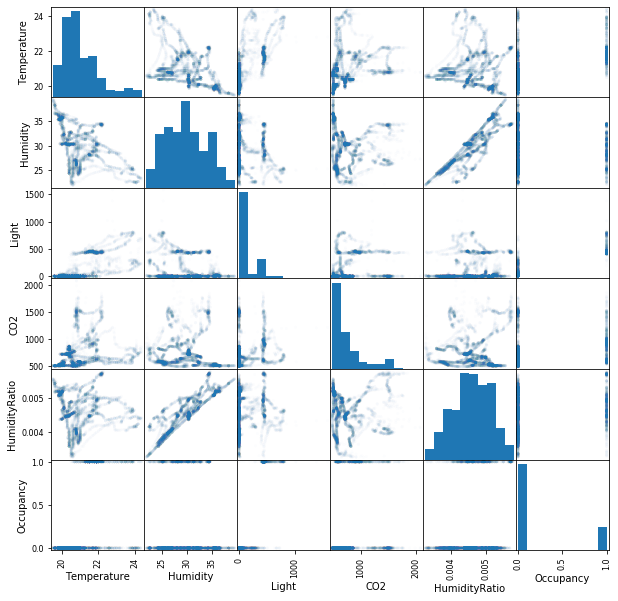

In [44]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))

Построим таблицу корреляции

In [45]:
data.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.472921,0.705538,0.199646,-0.010407,0.521767
Humidity,-0.472921,1.000000,-0.187477,-0.079224,0.884104,-0.087768
Light,0.705538,-0.187477,1.000000,0.190213,0.162681,0.914525
CO2,0.199646,-0.079224,0.190213,1.000000,0.043197,0.261908
HumidityRatio,-0.010407,0.884104,0.162681,0.043197,1.000000,0.190161
Occupancy,0.521767,-0.087768,0.914525,0.261908,0.190161,1.000000


Видна заметная положительная корреляция наличия людей в помещении с освещенностью помещения и, отчасти, с температурой. 

Диаграмма зависимости температуры помещения от освещенности.

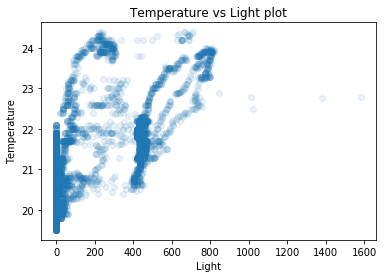

In [49]:
plt.plot(data['Light'], data['Temperature'], 'o', alpha = 0.1)
plt.xlabel('Light')
plt.ylabel('Temperature')
plt.title('Temperature vs Light plot')
pass

Диаграмма зависимости Occupancy помещения от освещенности.

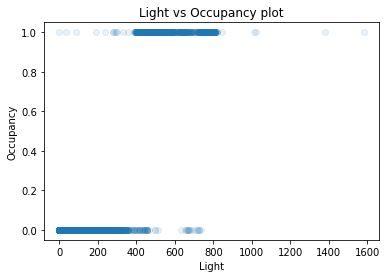

In [50]:
plt.plot(data['Light'], data['Occupancy'], 'o', alpha = 0.1)
plt.xlabel('Light')
plt.ylabel('Occupancy')
plt.title('Light vs Occupancy plot')
pass

Диаграмма зависимости Occupancy помещения от температуры.

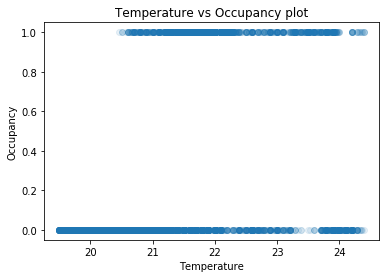

In [52]:
plt.plot(data['Temperature'], data['Occupancy'], 'o', alpha = 0.1)
plt.xlabel('Temperature')
plt.ylabel('Occupancy')
plt.title('Temperature vs Occupancy plot')
pass

Найдем категориальные и числовые признаки в нашей задаче.

In [57]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print("Категориальные признаки: ", categorical_columns)
print("Числовые признаки: ", numerical_columns)

Категориальные признаки:  ['date']
Числовые признаки:  ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']


Осуществим нормализацию числовых признаков - приведем к нулевому среднему и единичному среднеквадратичному отклонению.

In [59]:
data_numerical = data[numerical_columns]
data_numerical.describe()


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


In [60]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

Убедимся, что выборочное среднее приблизительно равно 0, а среднеквадратичное отклонение- 1.

In [61]:
data_numerical.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9.752000e+03,9.752000e+03,9.752000e+03,9.752000e+03,9.752000e+03,9.752000e+03
mean,-2.235383e-12,-3.336578e-13,-6.703233e-16,-1.585460e-15,-1.066688e-14,-1.165780e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.471322e+00,-2.030667e+00,-5.910440e-01,-9.039437e-01,-2.474674e+00,-5.157257e-01
25%,-6.973383e-01,-8.221491e-01,-5.910440e-01,-7.099128e-01,-7.391379e-01,-5.157257e-01
50%,-2.074751e-01,7.794130e-02,-5.910440e-01,-3.844710e-01,8.534591e-03,-5.157257e-01
75%,5.207881e-01,7.103974e-01,4.090940e-01,2.622053e-01,7.706205e-01,-5.157257e-01
max,3.319540e+00,2.430678e+00,7.001840e+00,4.454031e+00,2.221967e+00,1.938816e+00


In [62]:
type(data['date'])

pandas.core.series.Series

In [63]:
data = pd.concat((data_numerical, data[categorical_columns]), axis = 1)
print(data.shape)

(9752, 7)
